In [1]:
%matplotlib notebook

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ohlc

import os
import json

In [28]:
df = pd.read_csv("outfile.csv", sep=";", index_col=0)
df.index = pd.to_datetime(df.index)

In [30]:
df = df.sort_index()

In [31]:
print(df.head())

                     rate_open  rate_high  rate_low  rate_close
dtime                                                          
2002-01-02 00:01:00     0.8891     0.8891    0.8891      0.8891
2002-01-02 00:06:00     0.8890     0.8890    0.8887      0.8889
2002-01-02 00:07:00     0.8890     0.8890    0.8890      0.8890
2002-01-02 00:12:00     0.8890     0.8890    0.8890      0.8890
2002-01-02 00:13:00     0.8891     0.8891    0.8891      0.8891


<IPython.core.display.Javascript object>


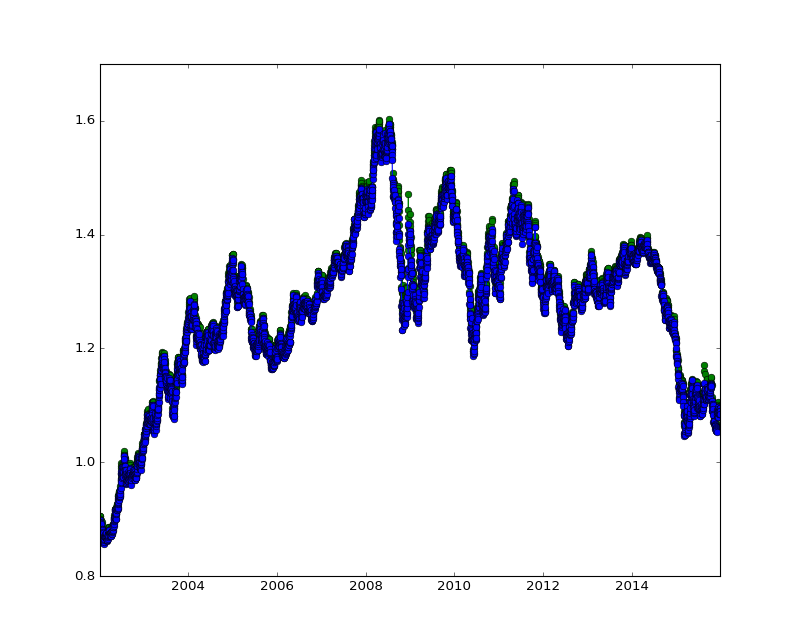

In [290]:
fig, ax = plt.subplots(figsize=(10, 8))
resampled_df = df.resample("D").ohlc()
ax.plot(resampled_df.rate_high.high, linestyle="-", marker="o", color="g")
ax.plot(resampled_df.rate_low.low, linestyle="-", marker="o", color="b")

In [115]:
resampled_df.head()

rate_open                         rate_high                  \
                open    high     low   close      open    high     low   
dtime                                                                    
2002-01-31    0.8891  0.9060  0.8575  0.8591    0.8891  0.9061  0.8575   
2002-02-28    0.8591  0.8796  0.8564  0.8690    0.8591  0.8797  0.8564   
2002-03-31    0.8691  0.8867  0.8632  0.8710    0.8691  0.8868  0.8632   
2002-04-30    0.8711  0.9040  0.8710  0.9003    0.8711  0.9041  0.8710   
2002-05-31    0.9004  0.9408  0.8994  0.9322    0.9004  0.9409  0.8994   

                   rate_low                         rate_close          \
             close     open    high     low   close       open    high   
dtime                                                                    
2002-01-31  0.8591   0.8891  0.9059  0.8573  0.8591     0.8891  0.9061   
2002-02-28  0.8691   0.8591  0.8796  0.8563  0.8690     0.8591  0.8796   
2002-03-31  0.8710   0.8691  0.8861  0.8631  0.8710     0.8691  0.8868   
2002-04-30  0.9003   0.8711  0.9040  0.8710  0.9003     0.8711  0.9041   
2002-05-31  0.9322   0.9003  0.9407  0.8994  0.9322     0.9003  0.9407   

                            
               low   close  
dtime                       
2002-01-31  0.8574  0.8591  
2002-02-28  0.8564  0.8690  
2002-03-31  0.8632  0.8710  
2002-04-30  0.8710  0.9003  
2002-05-31  0.8994  0.9322

<IPython.core.display.Javascript object>


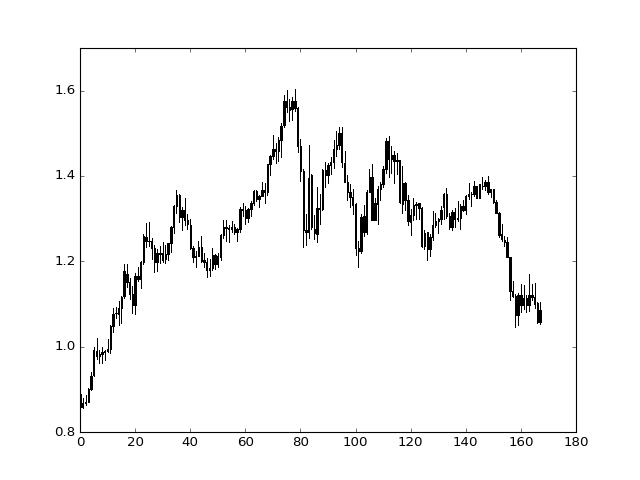

(<matplotlib.collections.LineCollection at 0x2109bc2f550>,
 <matplotlib.collections.PolyCollection at 0x2109bc2f5c0>)

In [111]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax, resampled_df.rate_open.open, resampled_df.rate_high.high,
                   resampled_df.rate_low.low, resampled_df.rate_close.close, 
                  colorup='g', width=0.5)

In [112]:
rate_close = resampled_df.rate_close.close.values
rate_open = resampled_df.rate_open.open.values

In [113]:
def calculate_shift(df, column_name, shift_size=1, direction=-1):
    return df[column_name] - df[column_name].shift(direction * shift_size)

In [120]:
calculate_shift(resampled_df, ("rate_open", "open")).head()

dtime
2002-01-31    0.0300
2002-02-28   -0.0100
2002-03-31   -0.0020
2002-04-30   -0.0293
2002-05-31   -0.0324
Freq: M, Name: (rate_open, open), dtype: float64

In [160]:
calculate_shift(resampled_df, ("rate_open", "open"), shift_size=2).head()

dtime
2002-01-31    0.0200
2002-02-28   -0.0120
2002-03-31   -0.0313
2002-04-30   -0.0617
2002-05-31   -0.0906
Freq: M, Name: (rate_open, open), dtype: float64

In [267]:
#values = [1, 2, 3, 4, 2, 3, 4, 5, 6, 4, 3, 2, 1, 0]
#ndf = pd.DataFrame(values, columns=["open"])
direction = 1

In [305]:
ndf = pd.DataFrame(df.rate_open.values, columns=["open"])

In [306]:
ndf["shift-1"] = ndf["open"].shift(1 * direction)
ndf["shift-2"] = ndf["open"].shift(2 * direction)
ndf["shift-3"] = ndf["open"].shift(3 * direction)
ndf["shift-4"] = ndf["open"].shift(4 * direction)


ndf["bool-shift-1"] = ndf["open"] > ndf["shift-1"]
ndf["bool-shift-2"] = ndf["shift-1"] > ndf["shift-2"]
ndf["bool-shift-3"] = ndf["shift-2"] > ndf["shift-3"]
ndf["bool-shift-4"] = ndf["shift-3"] > ndf["shift-4"]

ndf.head()

,open,shift-1,shift-2,shift-3,shift-4,bool-shift-1,bool-shift-2,bool-shift-3,bool-shift-4
0,0.8891,NaN,NaN,NaN,NaN,False,False,False,False
1,0.8890,0.8891,NaN,NaN,NaN,False,False,False,False
2,0.8890,0.8890,0.8891,NaN,NaN,False,False,False,False
3,0.8890,0.8890,0.8890,0.8891,NaN,False,False,False,False
4,0.8891,0.8890,0.8890,0.8890,0.8891,True,False,False,False


In [307]:
strike = ndf[ndf["bool-shift-1"]].shape[0]
two_strikes = ndf[ndf["bool-shift-1"] & ndf["bool-shift-2"]].shape[0]

In [308]:
three_strikes = ndf[ndf["bool-shift-1"] & ndf["bool-shift-2"] & ndf["bool-shift-3"]].shape[0]

In [309]:
four_strikes = ndf[ndf["bool-shift-1"] & ndf["bool-shift-2"] & ndf["bool-shift-3"] & ndf["bool-shift-4"]].shape[0]

In [313]:
strikes = strike, two_strikes, three_strikes, four_strikes
print(strikes)

(1660612, 572772, 209785, 78332)


In [311]:
[a / b for a, b in zip(strikes[1:], strikes[:-1])]

[0.3449162116135497, 0.3662626664711264, 0.3733918058965131]

In [312]:
index = ndf[ndf["bool-shift-1"] & ndf["bool-shift-2"] & ndf["bool-shift-3"] & ndf["bool-shift-4"]].index

In [298]:
index

Int64Index([  64,   65,  148,  149,  176,  177,  309,  310,  387,  428,  429,
             464,  470,  638,  645,  716,  820,  821,  876,  877,  981,  982,
            1002, 1003, 1023, 1024, 1058, 1059, 1142, 1143, 1205, 1311, 1318,
            1332, 1534, 1535, 1555, 1569, 1576, 1577, 1856, 1898, 1899, 2080,
            2129, 2186, 2542, 2634, 2696, 2697, 2808, 2809, 2816, 2844, 3180,
            3298, 3299, 3313, 3326, 3375, 3376, 3404, 3425, 3467, 3544, 3621,
            3669, 3670, 3676, 3677, 3887, 3978, 3998, 3999, 4138, 4174, 4180,
            4181, 4271, 4293, 4481, 4482, 4712, 4824, 4866, 4867, 5000],
           dtype='int64')

<IPython.core.display.Javascript object>


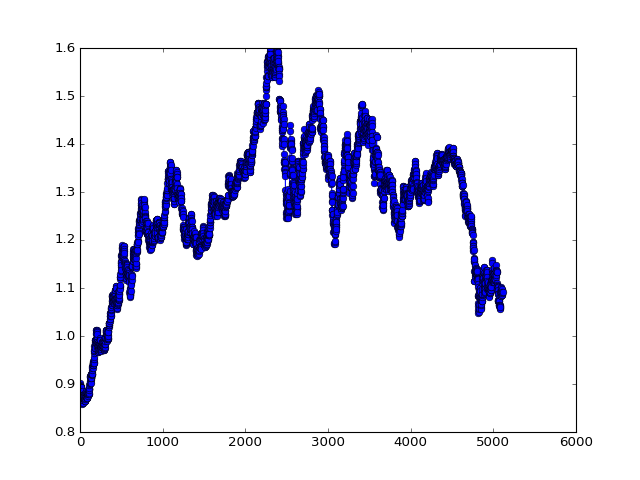

In [299]:
fig, ax = plt.subplots()
ax.plot(ndf.open, marker="o")